In [235]:
%matplotlib inline 
import matplotlib.pyplot as plt


In [242]:
import pandas as pd
import numpy as np
RHC

iteration   MSE_trg   MSE_val   MSE_tst   acc_trg   acc_val   acc_tst  \
0            0  0.112444  0.112946  0.112657  0.686781  0.686594  0.686715   
1           10  0.111722  0.112288  0.111962  0.686781  0.686594  0.686715   
2           20  0.110555  0.111079  0.110837  0.686781  0.686594  0.686715   
3           30  0.110527  0.111040  0.110802  0.686781  0.686594  0.686715   
4           40  0.109574  0.110000  0.109786  0.686781  0.686594  0.686715   
5           50  0.109604  0.110063  0.109778  0.686781  0.686594  0.686715   
6           60  0.109380  0.109734  0.109560  0.686781  0.686594  0.686715   
7           70  0.108759  0.109040  0.108882  0.686781  0.686594  0.686715   
8           80  0.108649  0.108934  0.108763  0.686781  0.686594  0.686715   
9           90  0.108628  0.108922  0.108740  0.686781  0.686594  0.686715   
10         100  0.108624  0.108910  0.108730  0.686781  0.686594  0.686715   
11         110  0.108621  0.108907  0.108731  0.686781  0.686594  0.686715   
12         120  0.108581  0.108864  0.108686  0.686781  0.686594  0.686715   
13         130  0.108539  0.108826  0.108641  0.686781  0.686594  0.686715   
14         140  0.108489  0.108697  0.108599  0.686781  0.686594  0.686715   
15         150  0.108460  0.108677  0.108546  0.686781  0.686594  0.686715   
16         160  0.108459  0.108708  0.108558  0.686781  0.686594  0.686715   
17         170  0.108264  0.108479  0.108357  0.686781  0.686594  0.686715   
18         180  0.108242  0.108448  0.108335  0.686781  0.686594  0.686715   
19         190  0.107708  0.107763  0.107774  0.686781  0.686594  0.686715   
20         200  0.107461  0.107453  0.107523  0.686781  0.686594  0.686715   
21         210  0.107117  0.106718  0.107297  0.686781  0.686594  0.686715   
22         220  0.107112  0.106686  0.107312  0.686781  0.686594  0.686715   
23         230  0.107095  0.106667  0.107304  0.686781  0.686594  0.686715   
24         240  0.106824  0.106304  0.107064  0.686781  0.686594  0.686715   
25         250  0.106731  0.106167  0.106979  0.686781  0.686594  0.686715   
26         260  0.106436  0.105886  0.106667  0.686781  0.686594  0.686715   
27         270  0.106336  0.105789  0.106582  0.686781  0.686594  0.686715   
28         280  0.106307  0.105751  0.106553  0.686781  0.686594  0.686715   
29         290  0.105242  0.104206  0.105534  0.686781  0.686594  0.686715   
..         ...       ...       ...       ...       ...       ...       ...   
471       4710  0.086496  0.086338  0.087775  0.738697  0.738768  0.730676   
472       4720  0.086582  0.086367  0.088016  0.737791  0.740217  0.730676   
473       4730  0.086458  0.086389  0.087832  0.739875  0.740942  0.731884   
474       4740  0.086985  0.086858  0.087885  0.738063  0.739130  0.731159   
475       4750  0.086481  0.086435  0.087904  0.740328  0.739493  0.731884   
476       4760  0.086484  0.086179  0.087784  0.740328  0.740580  0.732367   
477       4770  0.087598  0.086331  0.088978  0.736432  0.735870  0.728261   
478       4780  0.086460  0.086386  0.087816  0.740781  0.740580  0.732367   
479       4790  0.086461  0.086367  0.087798  0.740056  0.740580  0.731884   
480       4800  0.086446  0.086311  0.087807  0.740237  0.740580  0.732367   
481       4810  0.087392  0.086889  0.088561  0.742140  0.743841  0.733092   
482       4820  0.086781  0.086543  0.088019  0.736432  0.734420  0.727778   
483       4830  0.086443  0.086298  0.087804  0.740328  0.740942  0.732609   
484       4840  0.086449  0.086287  0.087715  0.740509  0.740942  0.733575   
485       4850  0.086439  0.086221  0.087648  0.740328  0.740217  0.733575   
486       4860  0.086430  0.086191  0.087698  0.740872  0.741667  0.734058   
487       4870  0.086566  0.085958  0.087633  0.739150  0.740217  0.733333   
488       4880  0.086442  0.086384  0.087757  0.741506  0.741304  0.733092   
489       4890  0.086367  0.086047  0.087687  0.740962  0.739130  0.732126   
490       4900  0.086367  0

In [317]:
from collections import defaultdict
dfs = defaultdict(defaultdict)
from itertools import product

#average each run with same parameters
df_big = pd.DataFrame(columns=["iterations","fitness","time","fevals","algorithm","hp","run","problem"])

for problem in ["KNAPSACK","FOURPEAKS","CONTPEAKS","TSP"]:
    for run in range(1,6):
        
        #for ga
        for pop,mate,mutate in product([100],[50,30,10],[50,30,10]):
            ga = pd.read_csv("{}/{}_GA{}_{}_{}_{}_LOG.txt".format(problem,problem,pop,mate,mutate,run)) 
            ga["algorithm"] = "GA"
            ga["hp"] = "pop_{}_mate_{}_mutate_{}".format(pop,mate,mutate)
            ga["run"] = run
            ga["problem"] = problem
            df_big = df_big.append(ga)
        
        
        #for rhc
        rhc = pd.read_csv("{}/{}_RHC_{}_LOG.txt".format(problem,problem,run))
        rhc["algorithm"] = "RHC"
        rhc["hp"] = "None"#.format(pop,mate,mutate)
        rhc["run"] = run
        rhc["problem"] = problem
        df_big = df_big.append(rhc)
        
        
        
        #for SA
        
        for CE in [0.15, 0.35, 0.55, 0.75, 0.95]:
            sa = pd.read_csv("{}/{}_SA{}_{}_LOG.txt".format(problem,problem,CE,run))
            sa["algorithm"] = "SA"
            sa["hp"] = "temp_{}".format(CE)
            sa["run"] = run
            sa["problem"] = problem
            df_big = df_big.append(sa)
            
            
            
        #for MIMIC
        for samples, keep, m in product([100], [50], [0.1, 0.3, 0.5, 0.7, 0.9]):
            mimic = pd.read_csv("{}/{}_MIMIC{}_{}_{}_{}_LOG.txt".format(problem,problem,samples,keep,m,run))
            mimic["algorithm"] = "MIMIC"
            mimic["hp"]= "samples_{}_keep_{}_m_{}".format(samples,keep,m)
            mimic["run"] = run
            mimic["problem"] = problem
            df_big = df_big.append(mimic)
        
        
     

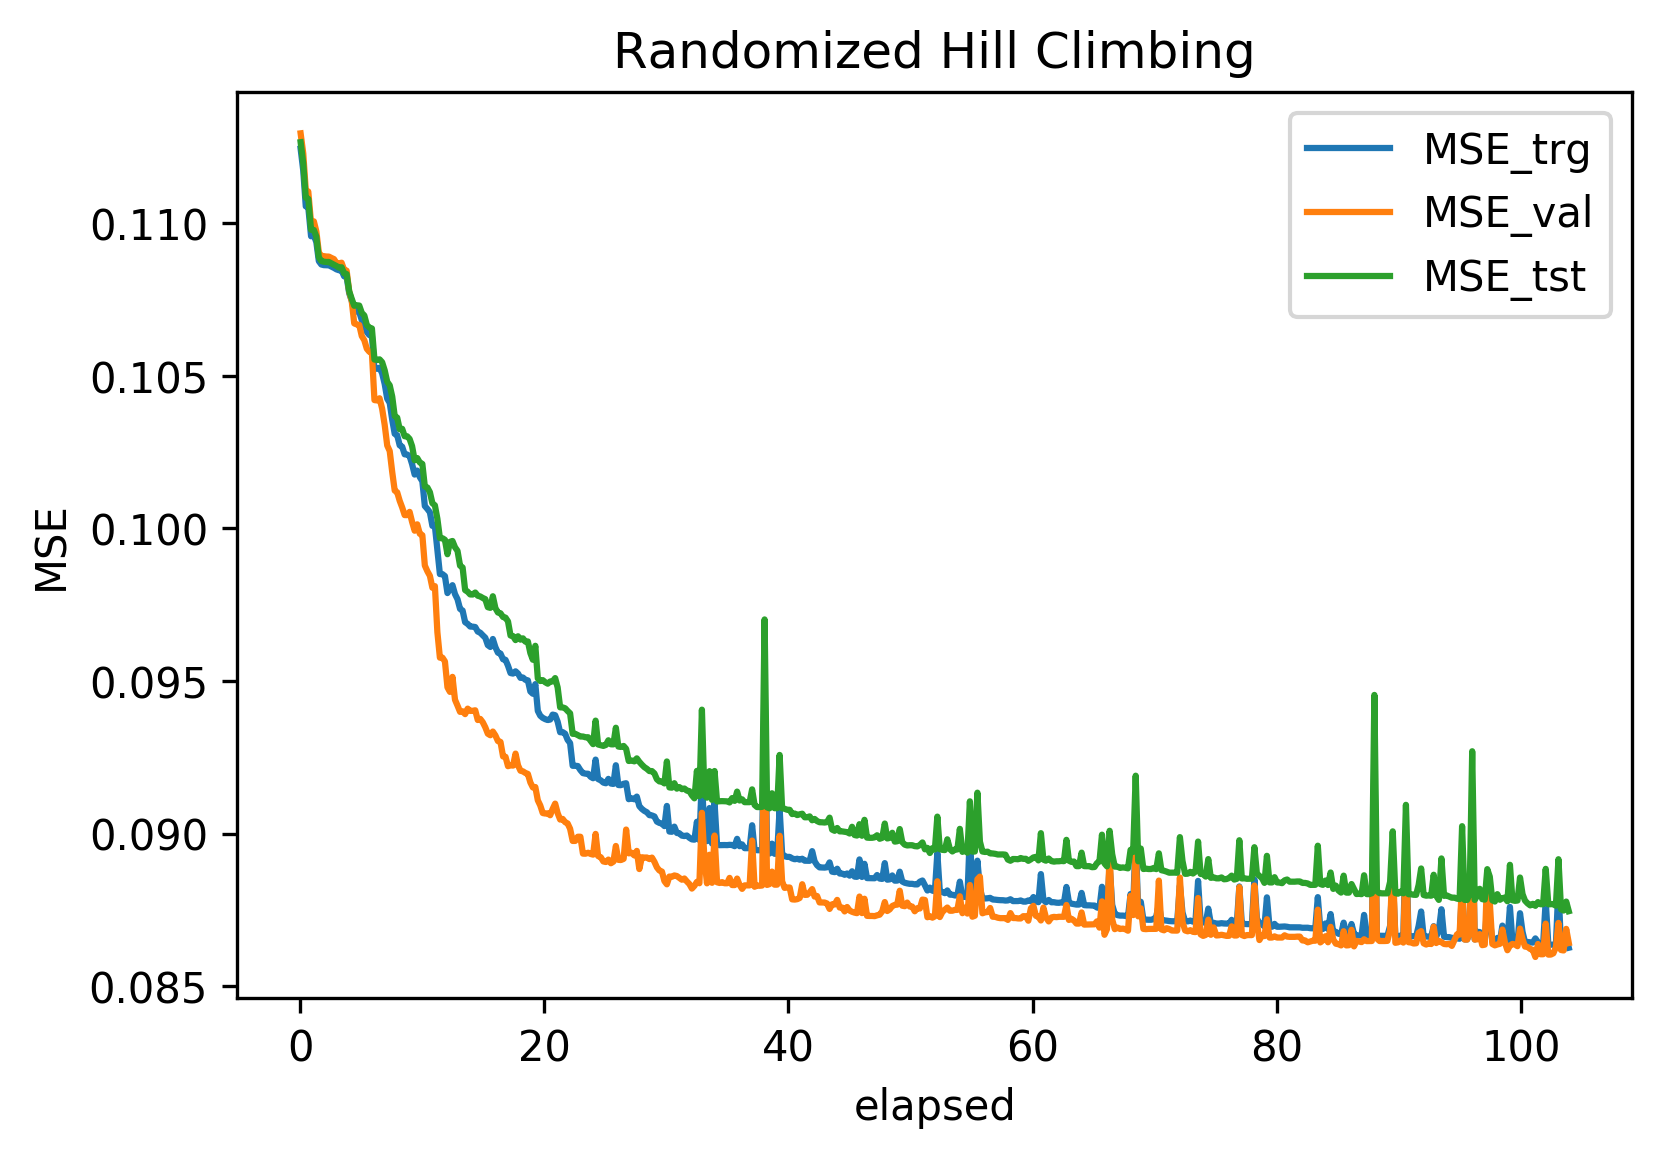

In [304]:
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
mpl.rcParams['figure.dpi']= 300
RHC = pd.read_csv("NN_OUTPUT/RHC_LOG.txt")
ax=RHC.plot(x="elapsed",y=["MSE_trg","MSE_val","MSE_tst"],title="Randomized Hill Climbing")
ax.set_ylabel("MSE")
plt.savefig("RHC_iteration_MSE.png")

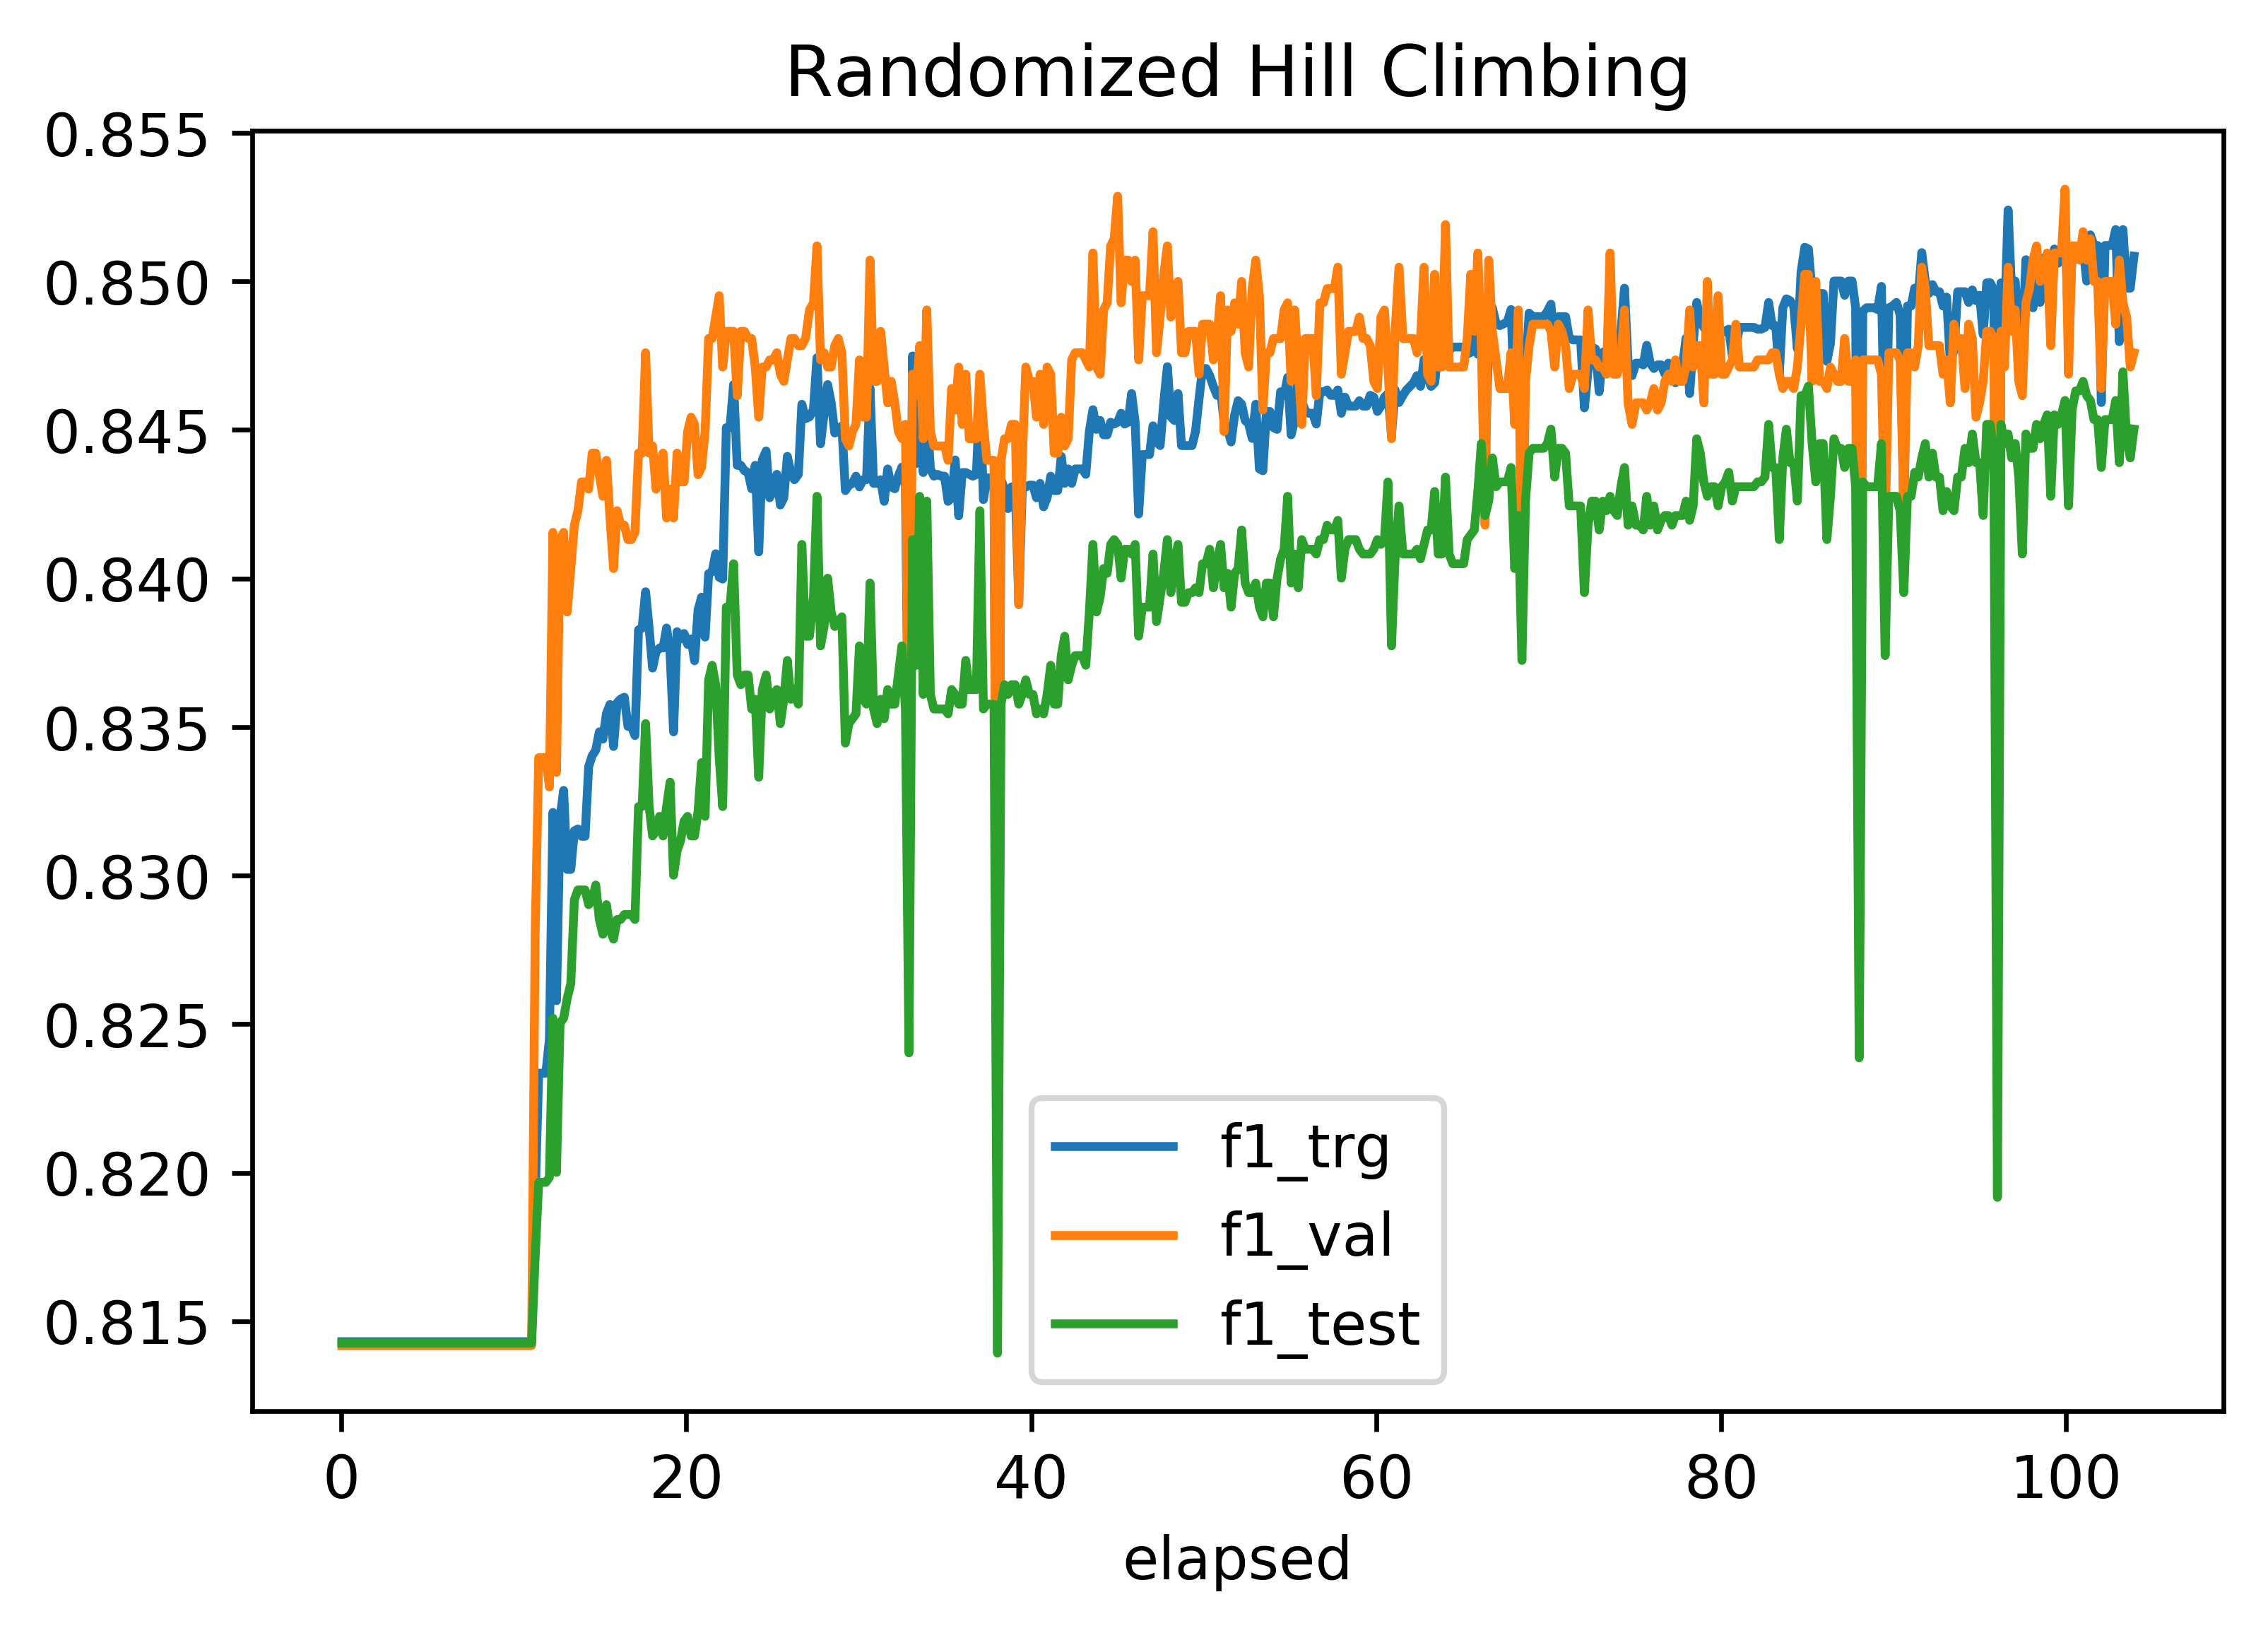

In [243]:
ax=RHC.plot(x="elapsed",y=["f1_trg","f1_val","f1_test"],title="Randomized Hill Climbing")
ax.set_ylabel("f1_score")
plt.savefig("RHC_timing_f1.png")

In [295]:
RHC[RHC.iteration==5000]

iteration   MSE_trg   MSE_val   MSE_tst   acc_trg   acc_val   acc_tst  \
500       5000  0.086261  0.086415  0.087458  0.740419  0.735507  0.731643   

       f1_trg    f1_val   f1_test     elapsed  
500  0.850851  0.847599  0.845027  103.939516

In [318]:
df_sa = pd.DataFrame(columns = ['iteration', 'MSE_trg', 'MSE_val', 'MSE_tst', 'acc_trg', 'acc_val',
       'acc_tst', 'f1_trg', 'f1_val', 'f1_test', 'elapsed',"hp"])
df_ga = pd.DataFrame(columns = ['iteration', 'MSE_trg', 'MSE_val', 'MSE_tst', 'acc_trg', 'acc_val',
       'acc_tst', 'f1_trg', 'f1_val', 'f1_test', 'elapsed',"hp"])
for CE in [0.15, 0.35, 0.55, 0.7, 0.95]:
    sa = pd.read_csv("NN_OUTPUT/SA{}_LOG.txt".format(CE),header=0,names =['iteration', 'MSE_trg', 'MSE_val', 'MSE_tst', 'acc_trg', 'acc_val',
       'acc_tst', 'f1_trg', 'f1_val', 'f1_test', 'elapsed'])
    sa["hp"] = CE 
    df_sa= df_sa.append(sa)
    
for p in [50]:
        for mate in [20,10]:
            for mutate in [20,10]:
                ga = pd.read_csv("NN_OUTPUT/GA_{}_{}_{}_LOG.txt".format(p,mate,mutate),header=0,names =['iteration', 'MSE_trg', 'MSE_val', 'MSE_tst', 'acc_trg', 'acc_val',
       'acc_tst', 'f1_trg', 'f1_val', 'f1_test', 'elapsed'])
                ga["hp"] = str(p)+"_"+str(mate)+"_"+str(mutate)
                df_ga = df_ga.append(ga)
df_ga.head()

iteration   MSE_trg   MSE_val   MSE_tst   acc_trg   acc_val   acc_tst  \
0         0  0.111557  0.111450  0.111658  0.407155  0.407089  0.407132   
1        10  0.110300  0.110405  0.109984  0.407155  0.407089  0.407132   
2        20  0.114344  0.114427  0.114021  0.407155  0.407089  0.407132   
3        30  0.116902  0.116814  0.116965  0.407155  0.407089  0.407132   
4        40  0.113498  0.113315  0.113508  0.407155  0.407089  0.407132   

    f1_trg    f1_val   f1_test    elapsed        hp  
0  0.81431  0.814178  0.814263   0.596643  50_20_20  
1  0.81431  0.814178  0.814263   6.749617  50_20_20  
2  0.81431  0.814178  0.814263  12.755910  50_20_20  
3  0.81431  0.814178  0.814263  18.803821  50_20_20  
4  0.81431  0.814178  0.814263  24.970388  50_20_20

In [330]:
df_ga[df_ga.iteration == 5000]


iteration   MSE_trg   MSE_val   MSE_tst   acc_trg   acc_val   acc_tst  \
500      5000  0.102336  0.100317  0.103071  0.408403  0.407909  0.408049   
500      5000  0.108565  0.109228  0.108284  0.407386  0.407312  0.407514   
500      5000  0.101192  0.097112  0.101144  0.407155  0.407089  0.407132   
500      5000  0.103646  0.101572  0.103901  0.407155  0.407089  0.407132   

       f1_trg    f1_val   f1_test      elapsed        hp  
500  0.816281  0.814942  0.815281  3129.549619  50_20_20  
500  0.814246  0.813924  0.814093  2621.819672  50_20_10  
500  0.814310  0.814178  0.814263  2405.061142  50_10_20  
500  0.814310  0.814178  0.814263  1803.186054  50_10_10

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Final f1-score


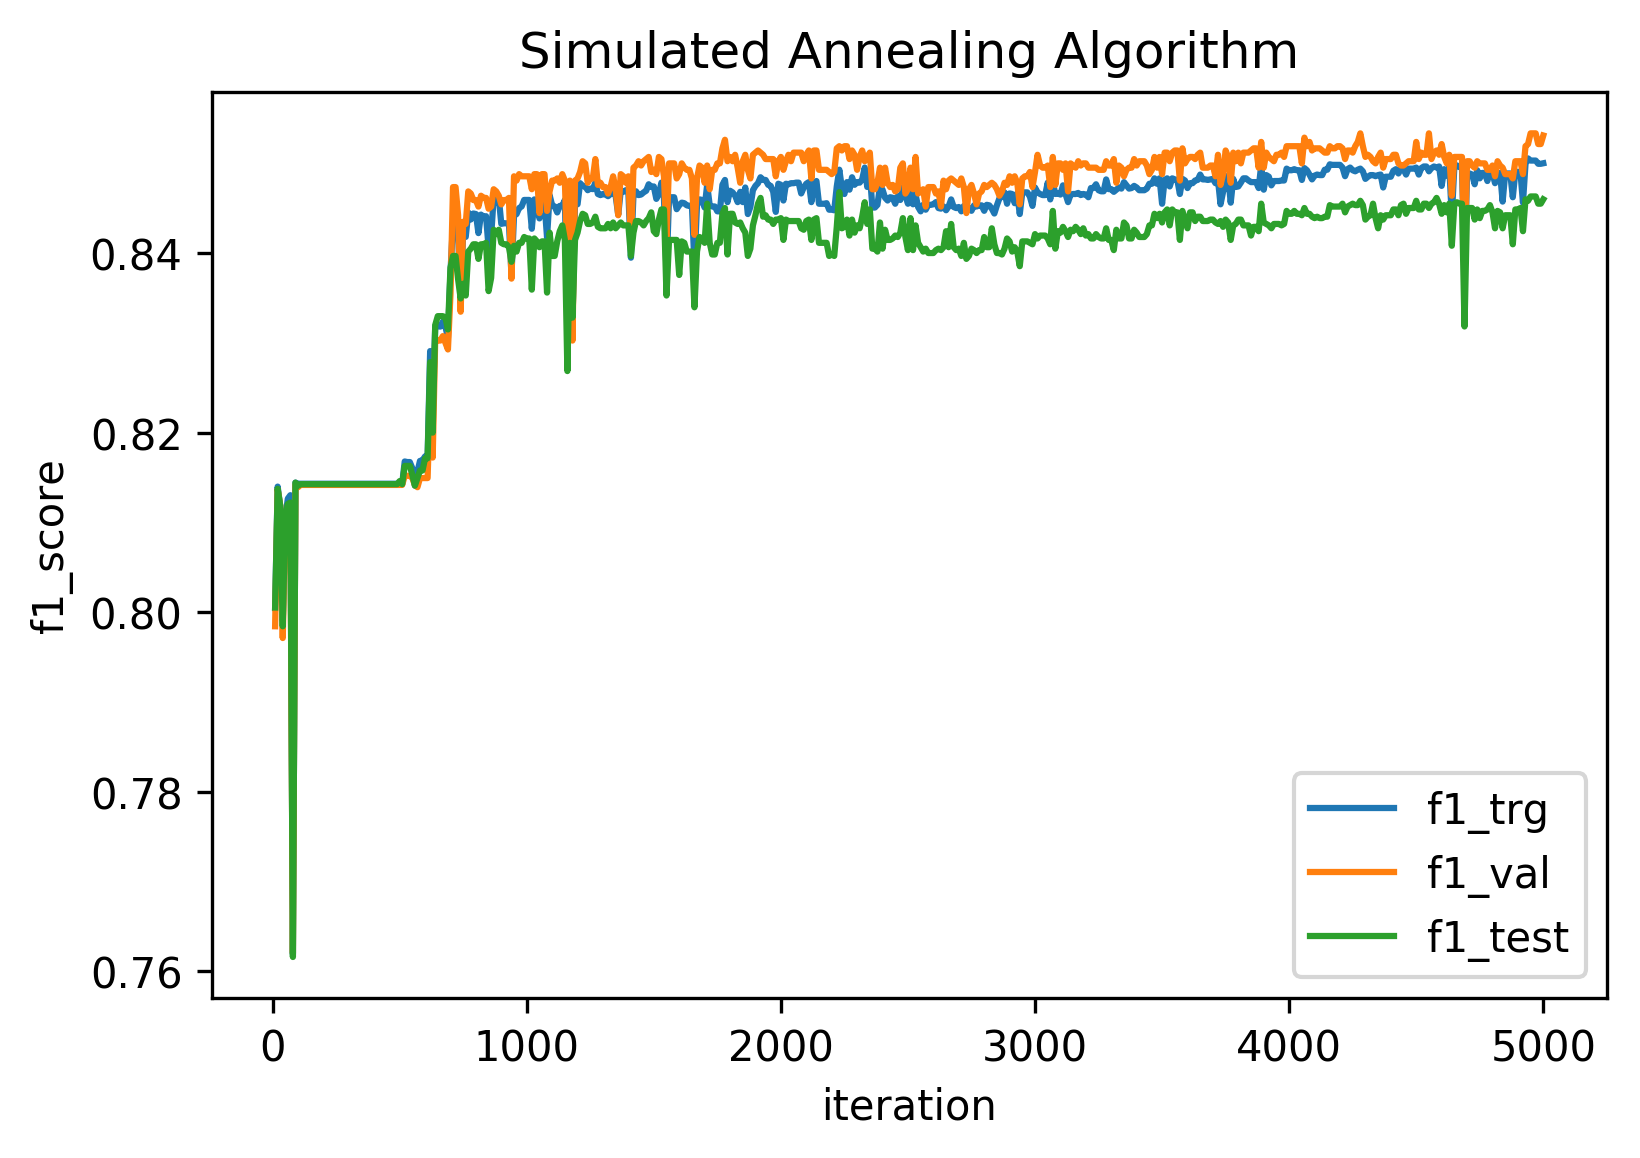

In [309]:
    
maxes=df_sa.groupby(["iteration","hp","elapsed"]).mean()

maxed=maxes.groupby(by=["iteration","hp"])['acc_tst'].max()
maxed = maxed.reset_index().sort_values("acc_tst",ascending=False)

best_hp = maxed["hp"][0]


df_clean = df_sa[df_sa["hp"]==.55]
#df_clean["score"] = df_clean.apply(lambda row: score_val(row),axis=1)
#df_clean=df_clean.drop("hp",axis=1)

df_clean["iteration"] = pd.to_numeric(df_clean["iteration"])

ax=df_clean.plot(x="iteration",y=["f1_trg","f1_val","f1_test"],title="Simulated Annealing Algorithm")
ax.set_ylabel("f1_score")
plt.savefig("SA_iter_f1.png")
print("Final f1-score")

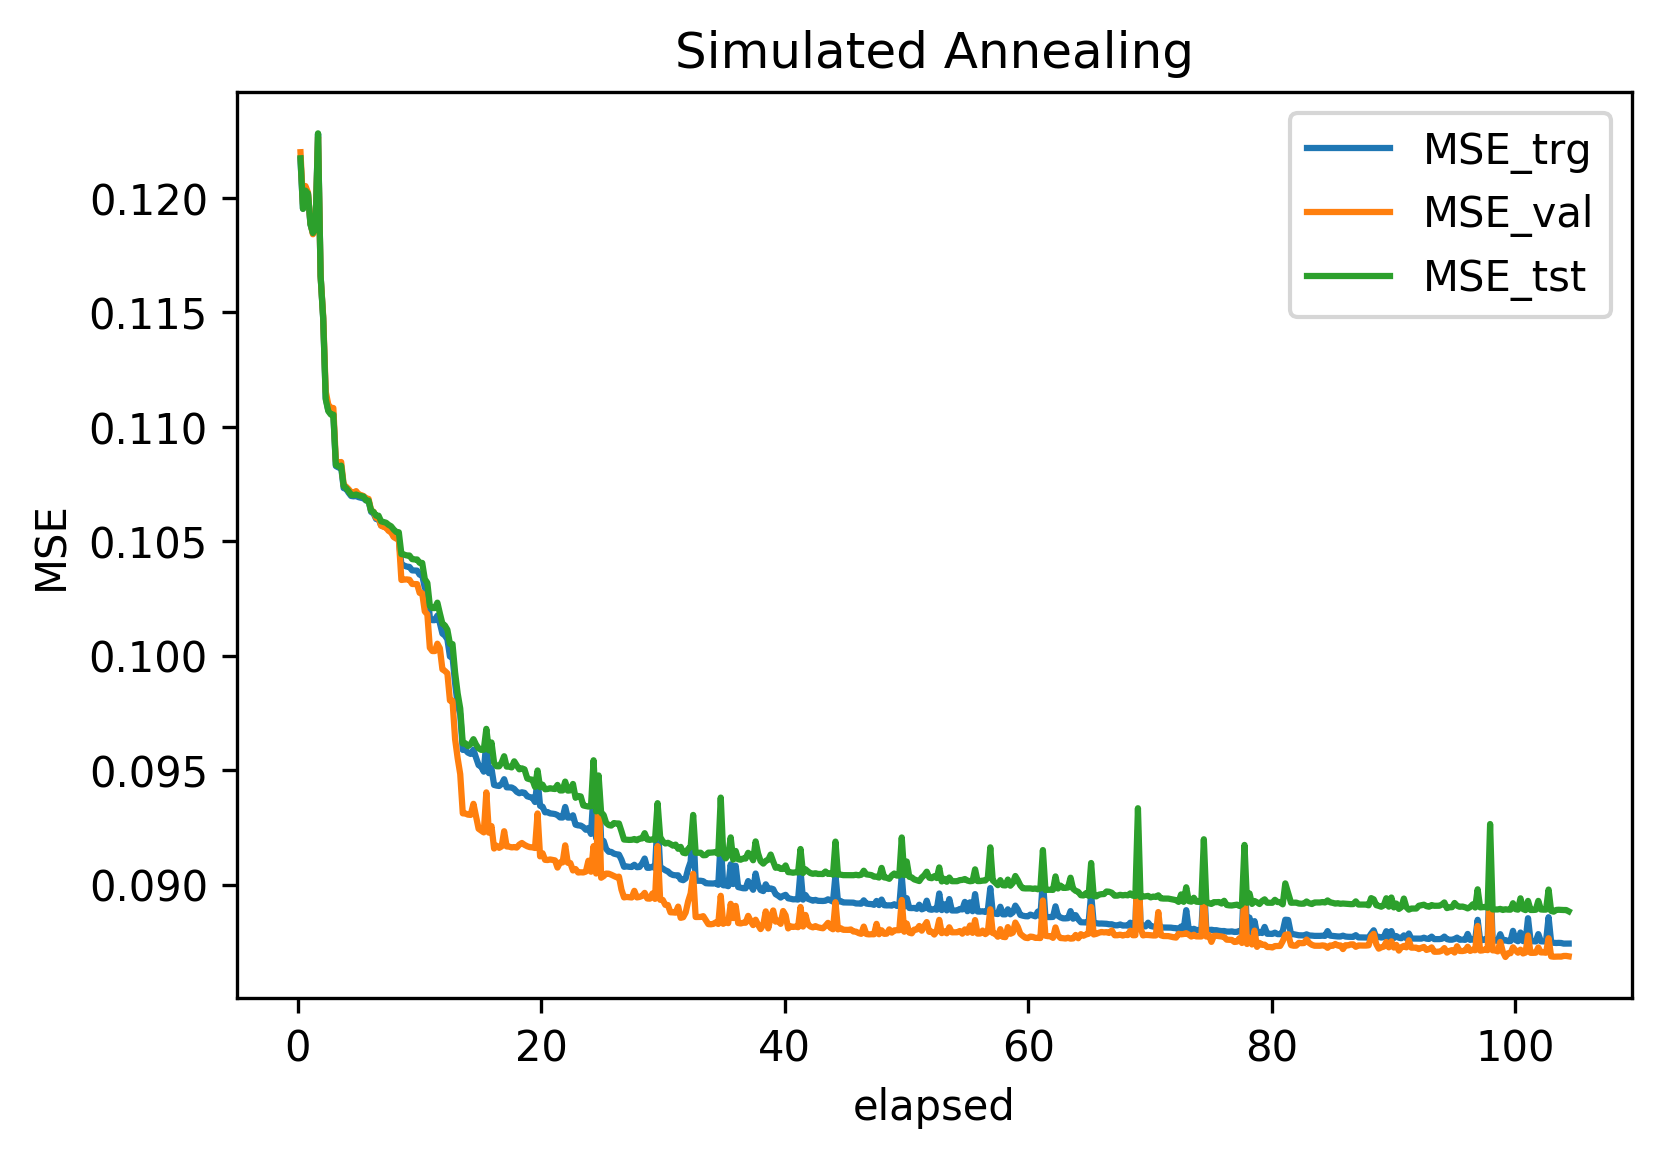

In [311]:
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
mpl.rcParams['figure.dpi']= 300
RHC = pd.read_csv("NN_OUTPUT/RHC_LOG.txt")
ax=df_clean.plot(x="elapsed",y=["MSE_trg","MSE_val","MSE_tst"],title="Simulated Annealing")
ax.set_ylabel("MSE")
plt.savefig("SA_elapsed_MSE.png")

In [328]:
    
maxes=df_ga.groupby(["iteration","hp"]).mean()

maxed=maxes.groupby(by=["iteration","hp"])['f1_test'].mean()
maxed = maxed.reset_index().sort_values("f1_test",ascending=False)

best_hp = maxed["hp"][0]
best_hp

'50_10_10'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


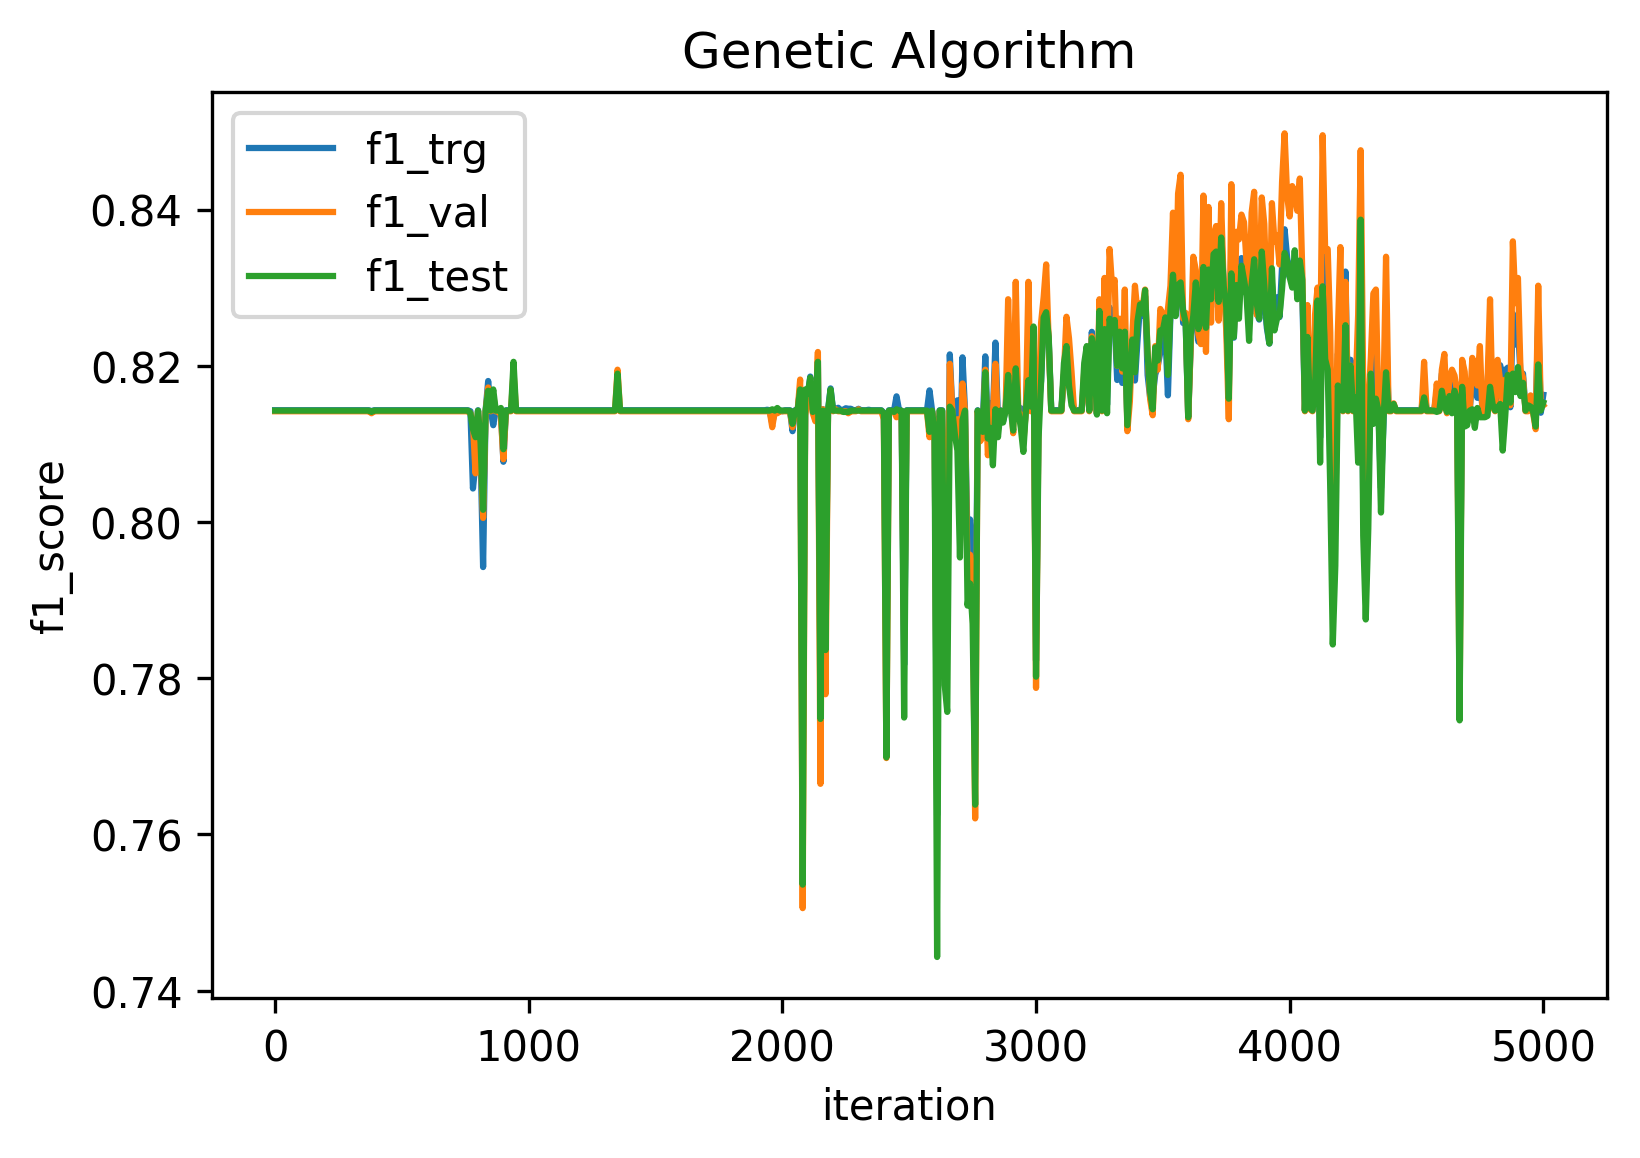

In [329]:
df_clean = df_ga[df_ga["hp"]=='50_20_20']
#df_clean["score"] = df_clean.apply(lambda row: score_val(row),axis=1)
#df_clean=df_clean.drop("hp",axis=1)

df_clean["iteration"] = pd.to_numeric(df_clean["iteration"])

ax=df_clean.plot(x="iteration",y=["f1_trg","f1_val","f1_test"],title="Genetic Algorithm")
ax.set_ylabel("f1_score")
plt.savefig("GA_iter_f1.png")


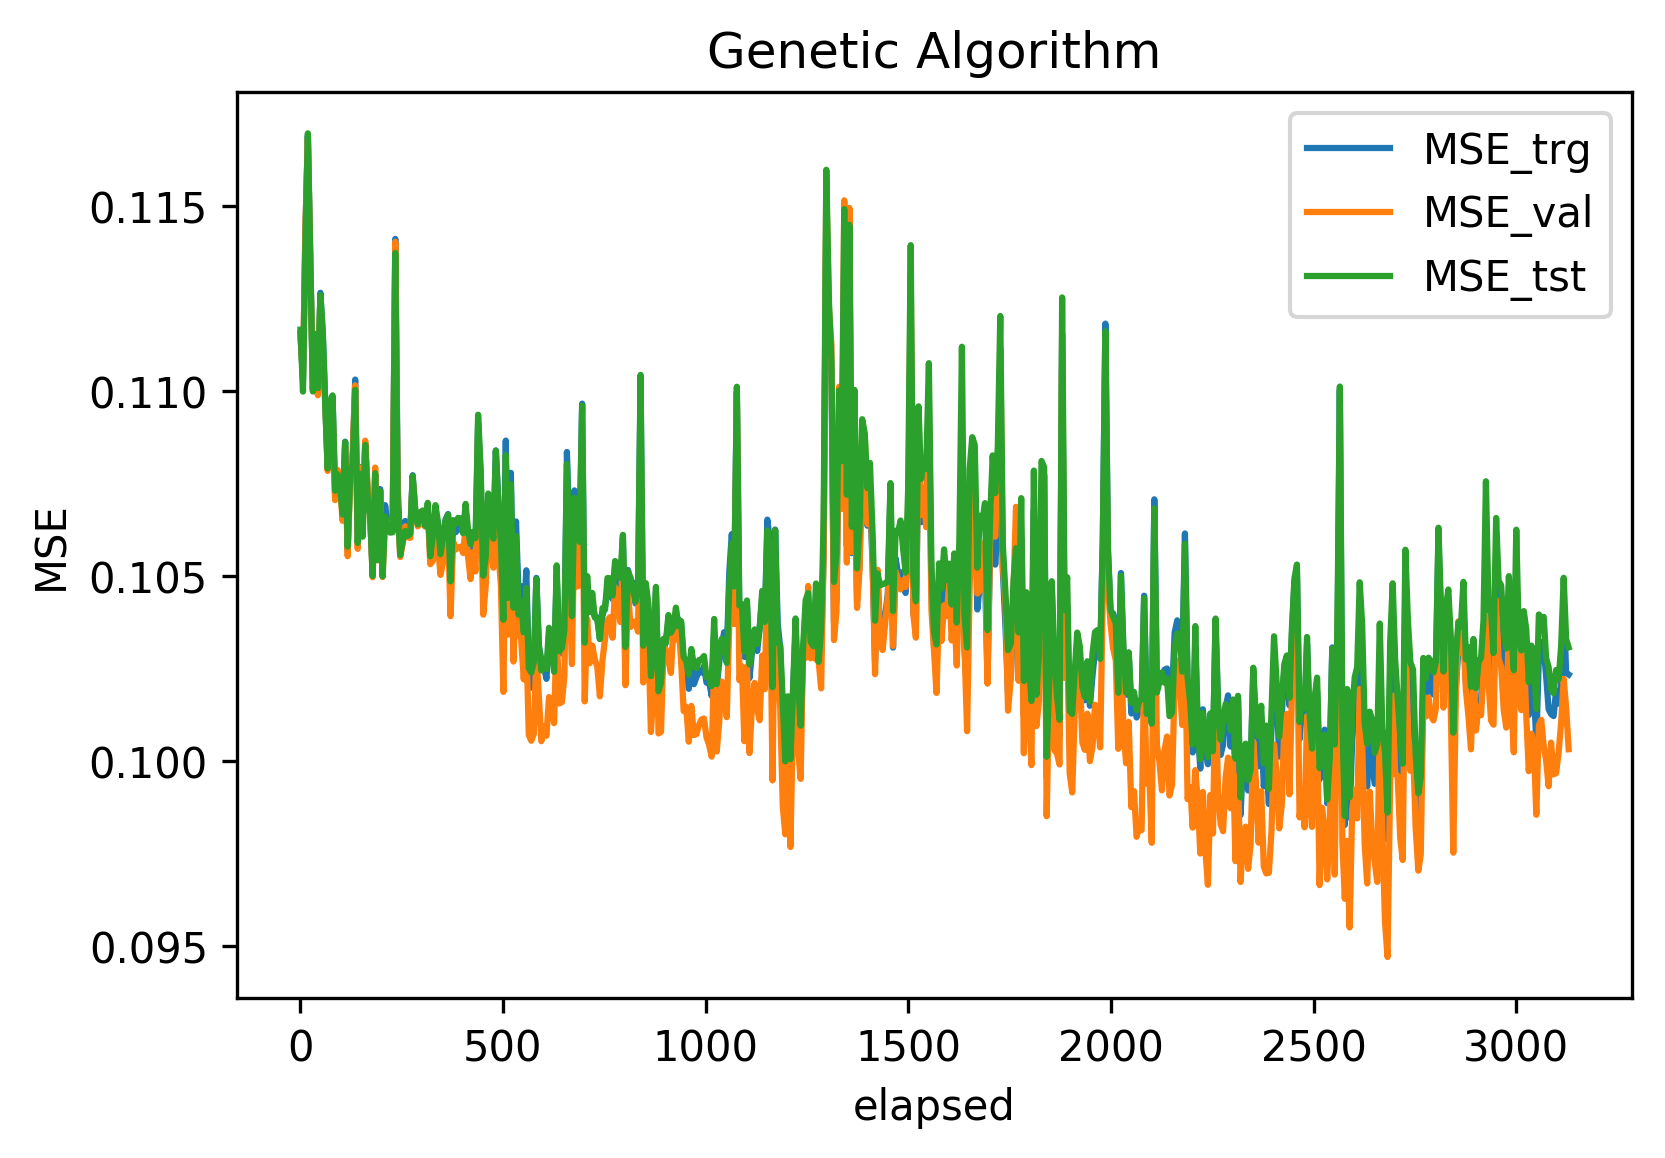

In [313]:

ax=df_clean.plot(x="elapsed",y=["MSE_trg","MSE_val","MSE_tst"],title="Genetic Algorithm")
ax.set_ylabel("MSE")
plt.savefig("GA_elapsed_MSE.png")



In [ ]:
df_knapsack = df_clean[df_clean["problem"] == "KNAPSACK"]
df_fourpeaks=df_clean[df_clean["problem"] == "FOURPEAKS"]
df_tsp= df_clean[df_clean["problem"] == "TSP"]
df_contpeaks= df_clean[df_clean["problem"] == "CONTPEAKS"]

In [ ]:
df_knapsack.head()

In [ ]:
#df_sa
#df_rhc

#fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#axes =[ax1,ax2,ax3]
for idx,df_p in enumerate([df_knapsack,df_fourpeaks,df_contpeaks,df_tsp]):
    sns.lineplot(np.log(df_p['iterations']),df_p['fitness'],hue=df_p["algorithm"],ci=None)
    plt.show()

In [ ]:
for idx,df_p in enumerate([df_knapsack,df_fourpeaks,df_contpeaks]):
    sns.lineplot(np.log1p(df_p['time']),(np.log1p(df_p['fevals'])),hue=df_p["algorithm"],ci=None)
    plt.show()

In [ ]:
df_clean.head()

In [ ]:
        
"""            
        rhc = pd.read_csv("{}/{}_RHC_{}_LOG.txt".format(problem,problem,run))
        rhc["algorithm"] = "RHC"
        dfs[problem]["ga"] = ga
        dfs[problem]["rhc"] = rhc

        for CE in [0.15, 0.35, 0.55, 0.75, 0.95]:
            sa = pd.read_csv("{}/{}_SA{}_5_LOG.txt".format(problem,problem,CE))
            dfs[problem]["sa"] = 
   # for dependence in [0.1, 0.3, 0.5, 0.7, 0.9]:
        
      #  mimic = pd.read_csv("{}/{}_GA100_10_50_5_LOG.txt".format(problem,problem))
  """  
df_big["fevals"] = df_big["fevals"].astype('float',coerce=True)

In [ ]:
df_big_analysis=df_big.groupby(["problem","algorithm","hp","iterations","run"],as_index=False).agg({"fitness":"mean","time":"mean","fevals":"mean"})#.plot(x="iterations",y="fitness",)

In [ ]:
bga=df_big_analysis#.plot(x="iterations",) #= df_big_analysis.pivot(index='iterations', columns='hp', values='fitness')
fig,ax = plt.subplots()

for name in bga["hp"].value_counts().index:
    ax.plot(bga[bga.hp==name].iterations,bga[bga.hp==name].fitness,label=name)

ax.set_xlabel("year")
ax.set_ylabel("weight")
ax.legend(loc='best')

In [ ]:
bga

In [ ]:
bga["hp"].value_counts().index

In [ ]:
plt.show()

In [ ]:
df = dfs["KNAPSACK"]["rhc"].append(dfs["KNAPSACK"]["ga"])
#fig, ax = plt.subplots()

df = df.pivot(index='iterations', columns='algorithm', values='fitness')

df.plot()
#plt.legend(loc='algorithm')
plt.show()

In [ ]:
df